In [160]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [161]:
df = pd.read_csv('sales_and_customer_insights.csv')


In [162]:
df.rename(columns={'Peak_Sales_Date':'Date'},inplace=True)
df.rename(columns={'Purchase_Frequency':'Frequency'},inplace=True)
df.rename(columns={'Lifetime_Value':'T_Purchases'},inplace=True)


In [163]:
df

,Customer_ID,Product_ID,Transaction_ID,Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,T_Purchases,Launch_Date,Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount


In [164]:
df.isnull().sum()


Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Frequency                   0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
T_Purchases                 0
Launch_Date                 0
Date                        0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [165]:
df['Date'] = pd.to_datetime(df['Date'])
date_now = pd.Timestamp('2024-1-1')
df['Recency']= (date_now - df['Date']).dt.days   

FEATURE SELECTION 

In [166]:
rfm_df = df[['Recency', 'Frequency', 'T_Purchases']].copy()

In [167]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)
for i, col in enumerate(rfm_df):
    df[f'{col}_Normalized'] = rfm_scaled[:, i]

In [168]:
df

,Customer_ID,Product_ID,Transaction_ID,Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,T_Purchases,Launch_Date,Date,Season,Preferred_Purchase_Times,Retention_Strategy,Recency,Recency_Normalized,Frequency_Normalized,T_Purchases_Normalized
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program,112,-0.677056,1.274771,-1.423639
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount,364,1.704724,0.008017,0.138060
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program,270,0.816282,-1.258738,-0.361965
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount,284,0.948603,0.369947,-0.053021
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount,65,-1.121277,1.455736,1.230516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program,325,1.336115,0.912841,-1.353210
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program,329,1.373921,1.455736,-1.549138
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount,241,0.542189,0.912841,-0.124100
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount,151,-0.308447,0.369947,0.634815


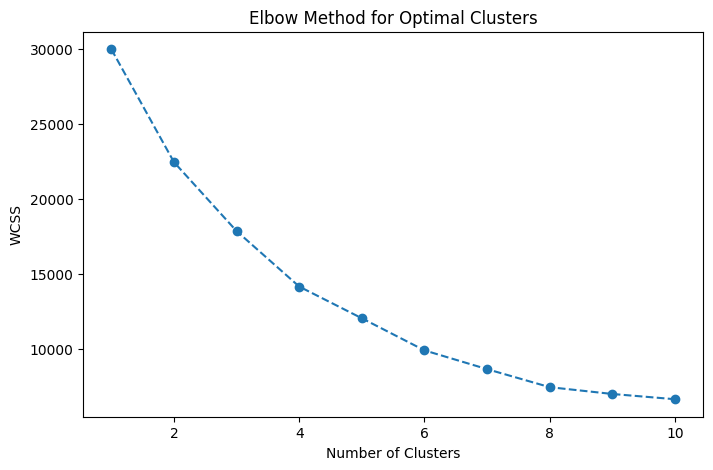

In [169]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


DEFINING SEGMENTATION THRESHOLD

In [170]:
Top_Pur_75 = df['T_Purchases'].quantile(0.75)
Low_Freq_25 = df['Frequency'].quantile(0.25)
high_Rec_75 = df['Recency'].quantile(0.75)
medium_churn = df['Churn_Probability'].quantile(0.5)

def assign_segment(row):
    if row['T_Purchase'] >= Top_Pur_75 and row['Recency'] <= high_Rec_75 and row['Frequency'] > Low_Freq_25:
        return 'Top Customer'
    elif row['Recency'] > high_Rec_75 or row['Churn_Probability'] >= medium_churn:
        return 'At Risk'
    elif row['Frequency'] <= Low_Freq_25:
        return 'Not Regular'
    else:
        return 'Other'

Top_Pur_75 = df['T_Purchases'].quantile(0.75)
Low_Freq_25 = df['Frequency'].quantile(0.25)
high_Rec_75 = df['Recency'].quantile(0.75)
medium_churn = df['Churn_Probability'].quantile(0.5)

def assign_segment(row):
    if row['T_Purchases'] >= Top_Pur_75 and row['Recency'] <= high_Rec_75 and row['Frequency'] > Low_Freq_25:
        return 'Top Customer'
    elif row['Recency'] > high_Rec_75 or row['Churn_Probability'] >= medium_churn:
        return 'At Risk'
    elif row['Frequency'] <= Low_Freq_25:
        return 'Not Regular'
    else:
        return 'Other'

df['Segment'] = df.apply(assign_segment, axis=1)

# Analyze the segmentation results
segmentation_summary = df.groupby('Segment').agg({
    'Customer_ID': 'count',
    'T_Purchases': 'mean',
    'Frequency': 'mean',
    'Recency': 'mean'
}).rename(columns={'Customer_ID': 'CustomerCount'}).reset_index()

In [171]:
df

,Customer_ID,Product_ID,Transaction_ID,Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,T_Purchases,Launch_Date,Date,Season,Preferred_Purchase_Times,Retention_Strategy,Recency,Recency_Normalized,Frequency_Normalized,T_Purchases_Normalized,Segment
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program,112,-0.677056,1.274771,-1.423639,At Risk
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount,364,1.704724,0.008017,0.138060,At Risk
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program,270,0.816282,-1.258738,-0.361965,At Risk
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount,284,0.948603,0.369947,-0.053021,At Risk
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount,65,-1.121277,1.455736,1.230516,Top Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,2022-03-04,2023-02-10,Winter,Evening,Loyalty Program,325,1.336115,0.912841,-1.353210,At Risk
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,2021-08-21,2023-02-06,Spring,Morning,Loyalty Program,329,1.373921,1.455736,-1.549138,At Risk
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,2020-09-13,2023-05-05,Spring,Evening,Discount,241,0.542189,0.912841,-0.124100,At Risk
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,2020-01-26,2023-08-03,Summer,Morning,Discount,151,-0.308447,0.369947,0.634815,Other


In [172]:
segmentation_summary

,Segment,CustomerCount,T_Purchases,Frequency,Recency
0,At Risk,5565,4549.095838,9.766217,220.840252
1,Not Regular,1060,5035.665726,2.959434,140.624528
2,Other,1989,3789.997592,12.493715,136.580694
3,Top Customer,1386,8749.983009,12.424964,134.668110


K- MEANS CLUSTER 

In [173]:
optimal_clusters = 3 # Replace with the chosen number from the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'T_Purchases': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'CustomerCount'}).reset_index()

In [176]:
df 

,Customer_ID,Product_ID,Transaction_ID,Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,T_Purchases,...,Date,Season,Preferred_Purchase_Times,Retention_Strategy,Recency,Recency_Normalized,Frequency_Normalized,T_Purchases_Normalized,Segment,Cluster
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,...,2023-09-11,Winter,Afternoon,Loyalty Program,112,-0.677056,1.274771,-1.423639,At Risk,2
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,...,2023-01-02,Spring,Afternoon,Discount,364,1.704724,0.008017,0.138060,At Risk,1
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,...,2023-04-06,Winter,Evening,Loyalty Program,270,0.816282,-1.258738,-0.361965,At Risk,0
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,...,2023-03-23,Spring,Evening,Discount,284,0.948603,0.369947,-0.053021,At Risk,0
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,...,2023-10-28,Spring,Morning,Discount,65,-1.121277,1.455736,1.230516,Top Customer,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_BIH0QW,PROD_AAPCHD,TRANS_EP2EGL,15,162.51,Clothing,72,Europe,0.84,1154.61,...,2023-02-10,Winter,Evening,Loyalty Program,325,1.336115,0.912841,-1.353210,At Risk,0
9996,CUST_DWJAD2,PROD_XWJQE5,TRANS_X7OPB7,18,63.02,Clothing,68,Europe,0.03,593.22,...,2023-02-06,Spring,Morning,Loyalty Program,329,1.373921,1.455736,-1.549138,At Risk,0
9997,CUST_43HBYL,PROD_PL3BU5,TRANS_VSZM3Y,15,116.80,Home,72,Asia,0.61,4676.35,...,2023-05-05,Spring,Evening,Discount,241,0.542189,0.912841,-0.124100,At Risk,0
9998,CUST_0SX4MD,PROD_X5O49V,TRANS_B2YCHY,12,144.21,Electronics,38,North America,0.05,6850.85,...,2023-08-03,Summer,Morning,Discount,151,-0.308447,0.369947,0.634815,Other,2


In [174]:
# Save the data as csv
output_file = 'C:/Users/HP/Desktop/CUSTOMER_SEGMENTATION/segmented_customers.csv'
df.to_csv(output_file, index=False)


In [175]:
cluster_analysis

,Cluster,Recency,Frequency,T_Purchases,CustomerCount
0,0,252.259000,9.450462,2371.087643,3139
1,1,249.668716,9.953413,7696.344639,3091
2,2,72.355438,10.378249,5062.880711,3770
